# The Bloch Sphere: A Comprehensive Guide

The Bloch sphere is a geometric representation of the pure state space of a two-level quantum mechanical system (qubit). It provides an intuitive way to visualize and understand qubit states and operations. This notebook explores the Bloch sphere in depth, with numerous examples using Qiskit to demonstrate its properties and applications in quantum computing.

## 1. Introduction to the Bloch Sphere

The Bloch sphere is a unit sphere in 3D space where:
- The north pole represents the quantum state $|0\rangle$
- The south pole represents the quantum state $|1\rangle$
- Points on the surface represent pure quantum states
- Points inside the sphere represent mixed quantum states

Any single-qubit pure state can be written as:

$$|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$$

where:
- $\theta$ is the polar angle (0 to $\pi$)
- $\phi$ is the azimuthal angle (0 to $2\pi$)

This parameterization maps directly to coordinates on the Bloch sphere:
- $x = \sin\theta\cos\phi$
- $y = \sin\theta\sin\phi$
- $z = \cos\theta$

![The Bloch Sphere](./images/The-Bloch-sphere.png)

## 2. Setting Up Qiskit

Let's start by importing the necessary Qiskit packages for our exploration of the Bloch sphere.

In [71]:
# Import basic Qiskit packages
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

## 3. Basic States on the Bloch Sphere

Let's visualize the basic quantum states on the Bloch sphere. We'll look at the computational basis states $|0\rangle$ and $|1\rangle$, as well as the superposition states $|+\rangle$ and $|-\rangle$.

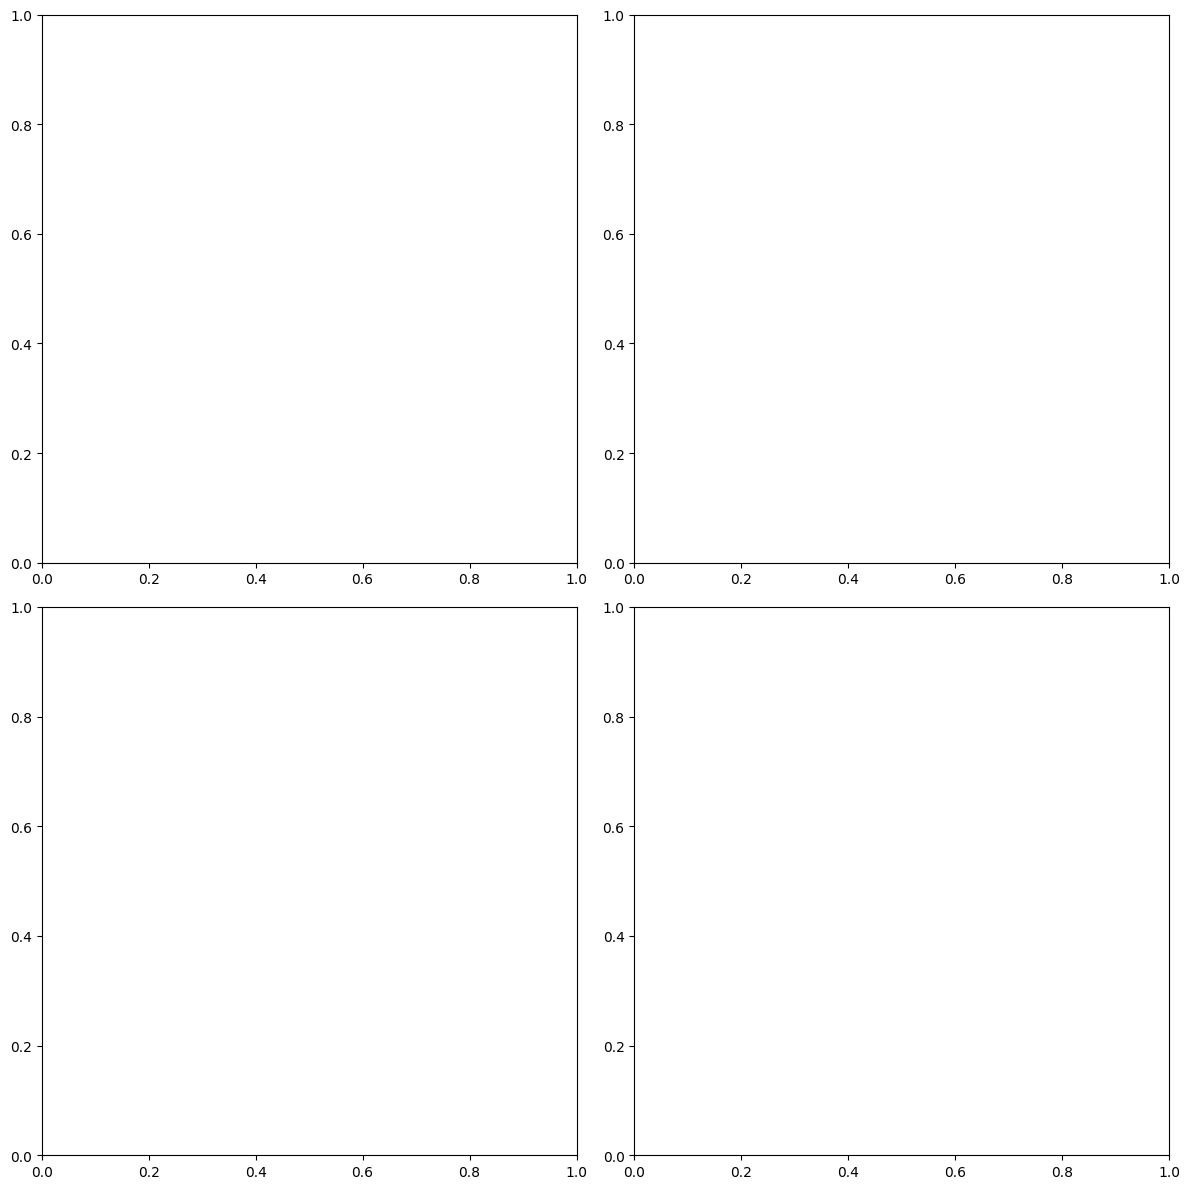

In [72]:
# Create a circuit with one qubit
qc_0 = QuantumCircuit(1)
# |0⟩ state (default)
state_0 = Statevector(qc_0)

# Create |1⟩ state
qc_1 = QuantumCircuit(1)
qc_1.x(0)  # Apply X gate to flip from |0⟩ to |1⟩
state_1 = Statevector(qc_1)

# Create |+⟩ state
qc_plus = QuantumCircuit(1)
qc_plus.h(0)  # Apply Hadamard gate to create superposition
state_plus = Statevector(qc_plus)

# Create |-⟩ state
qc_minus = QuantumCircuit(1)
qc_minus.x(0)  # First apply X gate
qc_minus.h(0)  # Then apply Hadamard gate
state_minus = Statevector(qc_minus)

# Visualize all states
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot |0⟩ state
plot_bloch_multivector(state_0, title='|0⟩ state')

# Plot |1⟩ state
plot_bloch_multivector(state_1, title='|1⟩ state')

# Plot |+⟩ state
plot_bloch_multivector(state_plus, title='|+⟩ state')

# Plot |-⟩ state
plot_bloch_multivector(state_minus, title='|-⟩ state')

plt.tight_layout()
plt.show()

### Observations:

- $|0\rangle$ is at the north pole (positive z-axis)
- $|1\rangle$ is at the south pole (negative z-axis)
- $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ is on the positive x-axis
- $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ is on the negative x-axis

These states form the basis for understanding qubit operations in quantum computing.

## 4. Quantum Gates as Rotations on the Bloch Sphere

Single-qubit quantum gates can be visualized as rotations on the Bloch sphere. Let's explore the most common gates and their effects.

### 4.1 Pauli Gates (X, Y, Z)

The Pauli gates represent 180-degree rotations around the x, y, and z axes of the Bloch sphere.

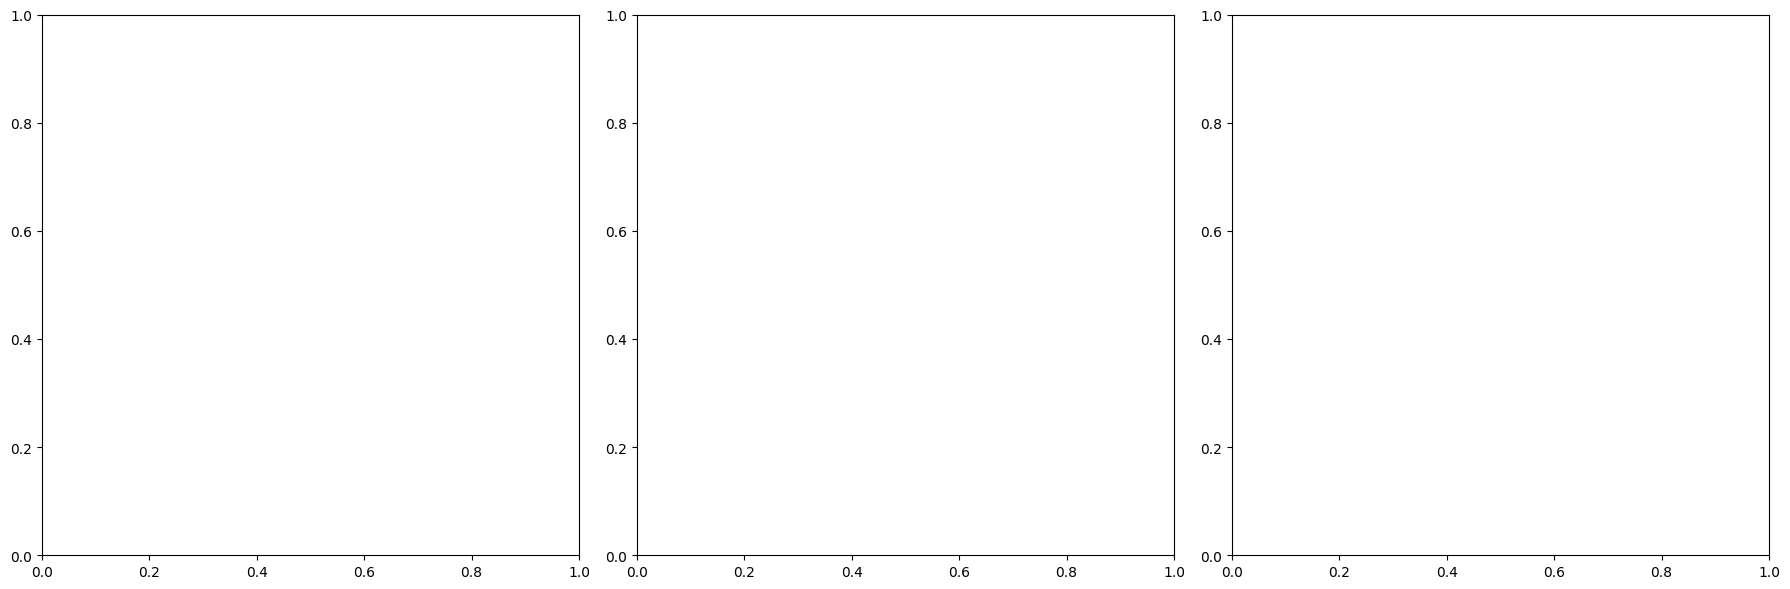

In [73]:
# Start with |0⟩ state
qc_x = QuantumCircuit(1)
qc_y = QuantumCircuit(1)
qc_z = QuantumCircuit(1)

# Apply X, Y, Z gates
qc_x.x(0)  # X gate - rotation around x-axis
qc_y.y(0)  # Y gate - rotation around y-axis
qc_z.z(0)  # Z gate - rotation around z-axis

# Get statevectors
state_x = Statevector(qc_x)
state_y = Statevector(qc_y)
state_z = Statevector(qc_z)

# Visualize the states
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_bloch_multivector(state_x, title='|0⟩ after X gate')

plt.subplot(1, 3, 2)
plot_bloch_multivector(state_y, title='|0⟩ after Y gate')

plt.subplot(1, 3, 3)
plot_bloch_multivector(state_z, title='|0⟩ after Z gate')

plt.tight_layout()
plt.show()

### Observations:

- **X gate**: Flips the state from $|0\rangle$ to $|1\rangle$ (or vice versa), rotating around the x-axis
- **Y gate**: Rotates around the y-axis, taking $|0\rangle$ to $i|1\rangle$ (note the phase change)
- **Z gate**: Leaves $|0\rangle$ unchanged but adds a phase to $|1\rangle$ (not visible when starting with $|0\rangle$)

Let's see the effect of the Z gate on a superposition state:

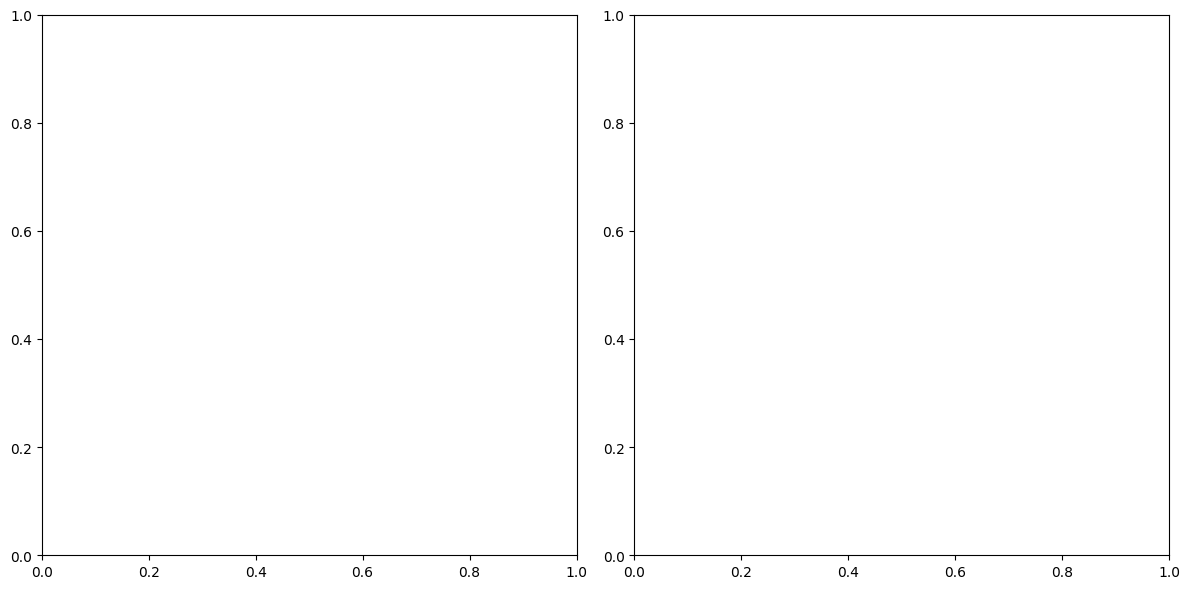

State |+⟩:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

State |+⟩ after Z gate:
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


In [74]:
# Create |+⟩ state
qc_plus = QuantumCircuit(1)
qc_plus.h(0)

# Apply Z gate to |+⟩ state
qc_plus_z = QuantumCircuit(1)
qc_plus_z.h(0)
qc_plus_z.z(0)

# Get statevectors
state_plus = Statevector(qc_plus)
state_plus_z = Statevector(qc_plus_z)

# Visualize the states
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plot_bloch_multivector(state_plus, title='|+⟩ state')
plot_bloch_multivector(state_plus_z, title='|+⟩ after Z gate')

plt.tight_layout()
plt.show()

# Print the statevectors to see the mathematical representation
print("State |+⟩:")
print(state_plus)
print("\nState |+⟩ after Z gate:")
print(state_plus_z)

### 4.2 Rotation Gates (RX, RY, RZ)

Qiskit provides rotation gates that allow rotations by arbitrary angles around the x, y, and z axes.

TypeError: plot_bloch_multivector() got an unexpected keyword argument 'ax'

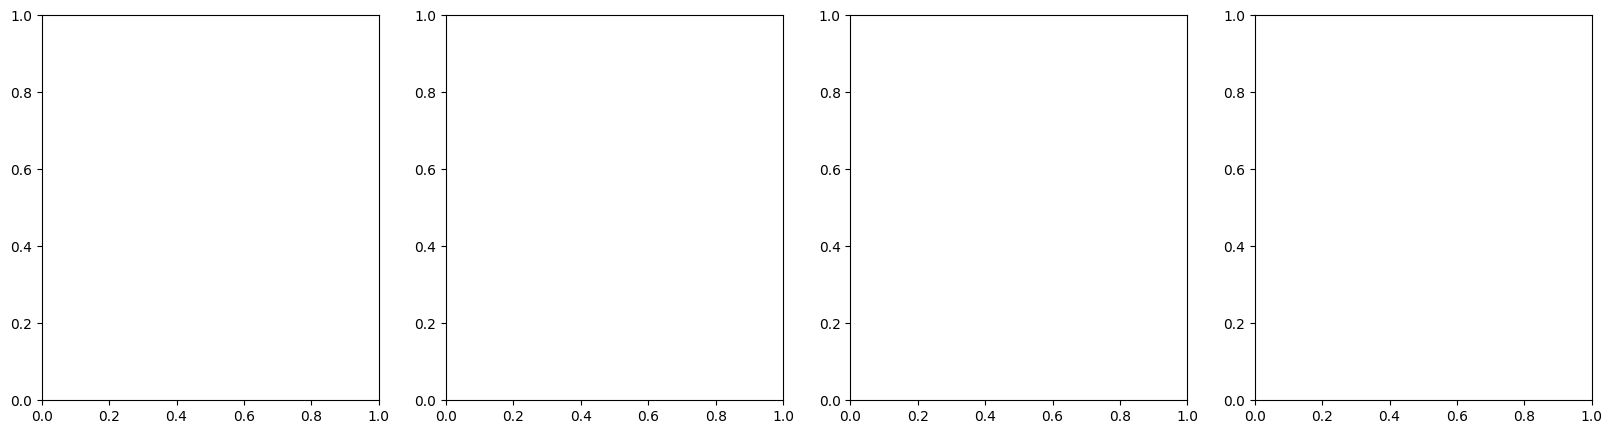

In [75]:
# Create circuits for different rotation angles
angles = [np.pi/4, np.pi/2, np.pi, 3*np.pi/2]
rx_circuits = []
ry_circuits = []
rz_circuits = []

for angle in angles:
    # RX rotations
    qc_rx = QuantumCircuit(1)
    qc_rx.rx(angle, 0)
    rx_circuits.append(Statevector(qc_rx))
    
    # RY rotations
    qc_ry = QuantumCircuit(1)
    qc_ry.ry(angle, 0)
    ry_circuits.append(Statevector(qc_ry))
    
    # RZ rotations (starting from |+⟩ to see the effect)
    qc_rz = QuantumCircuit(1)
    qc_rz.h(0)  # First create |+⟩
    qc_rz.rz(angle, 0)
    rz_circuits.append(Statevector(qc_rz))

# Visualize RX rotations
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, angle in enumerate(angles):
    plot_bloch_multivector(rx_circuits[i], ax=axs[i], title=f'RX({angle:.2f})')
plt.suptitle('Rotations around X-axis', fontsize=16)
plt.tight_layout()
plt.show()

# Visualize RY rotations
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, angle in enumerate(angles):
    plot_bloch_multivector(ry_circuits[i], ax=axs[i], title=f'RY({angle:.2f})')
plt.suptitle('Rotations around Y-axis', fontsize=16)
plt.tight_layout()
plt.show()

# Visualize RZ rotations
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, angle in enumerate(angles):
    plot_bloch_multivector(rz_circuits[i], ax=axs[i], title=f'RZ({angle:.2f}) on |+⟩')
plt.suptitle('Rotations around Z-axis (starting from |+⟩ state)', fontsize=16)
plt.tight_layout()
plt.show()

### Observations:

- **RX gate**: Rotates the state around the x-axis by the specified angle
- **RY gate**: Rotates the state around the y-axis by the specified angle
- **RZ gate**: Rotates the state around the z-axis by the specified angle (visible when starting from a superposition state)

These rotation gates are fundamental for implementing arbitrary single-qubit operations.

## 5. Creating Arbitrary States on the Bloch Sphere

Any point on the Bloch sphere represents a valid pure quantum state. Let's see how to create arbitrary states using Qiskit.

TypeError: plot_bloch_multivector() got an unexpected keyword argument 'ax'

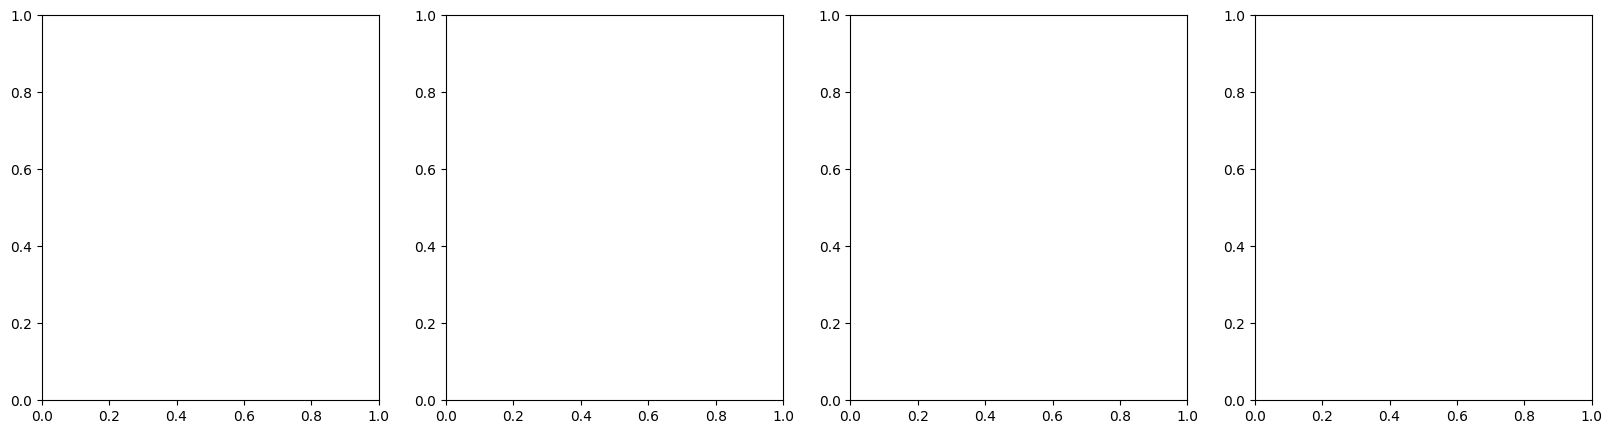

In [ ]:
def create_bloch_state(theta, phi):
    """Create a quantum state with the given Bloch sphere coordinates."""
    qc = QuantumCircuit(1)
    
    # Start from |0⟩ and apply rotations
    qc.ry(theta, 0)      # Rotation around y-axis by theta
    qc.rz(phi, 0)        # Rotation around z-axis by phi
    
    return qc

# Create several states at different points on the Bloch sphere
states = [
    ("θ=π/4, φ=0", np.pi/4, 0),
    ("θ=π/2, φ=π/4", np.pi/2, np.pi/4),
    ("θ=3π/4, φ=π/2", 3*np.pi/4, np.pi/2),
    ("θ=π/3, φ=2π/3", np.pi/3, 2*np.pi/3)
]

# Visualize the states
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, (label, theta, phi) in enumerate(states):
    qc = create_bloch_state(theta, phi)
    state = Statevector(qc)
    plot_bloch_multivector(state, ax=axs[i], title=label)
    
    # Calculate the Bloch vector coordinates
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    # Print the state and its Bloch vector
    print(f"State {label}:")
    print(f"Statevector: {state}")
    print(f"Bloch vector: ({x:.4f}, {y:.4f}, {z:.4f})\n")

plt.suptitle('Arbitrary States on the Bloch Sphere', fontsize=16)
plt.tight_layout()
plt.show()

### Alternative Method: Using initialize()

Qiskit provides a convenient `initialize()` method to directly prepare a qubit in a specific state.

In [ ]:
# Create states using initialize()
states = [
    ("[0.7071, 0.7071]", [0.7071, 0.7071]),  # |+⟩ state
    ("[0.7071, -0.7071]", [0.7071, -0.7071]),  # |-⟩ state
    ("[0.7071, 0.7071j]", [0.7071, 0.7071j]),  # |+i⟩ state
    ("[0.7071, -0.7071j]", [0.7071, -0.7071j])  # |-i⟩ state
]

# Visualize the states
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, (label, state_vector) in enumerate(states):
    qc = QuantumCircuit(1)
    qc.initialize(state_vector, 0)
    state = Statevector(qc)
    plot_bloch_multivector(state, ax=axs[i], title=label)

plt.suptitle('States Created Using initialize()', fontsize=16)
plt.tight_layout()
plt.show()

## 6. Measuring Quantum States

When we measure a qubit, its state collapses to either $|0\rangle$ or $|1\rangle$. The probability of each outcome depends on the state's position on the Bloch sphere.

TypeError: plot_bloch_multivector() got an unexpected keyword argument 'ax'

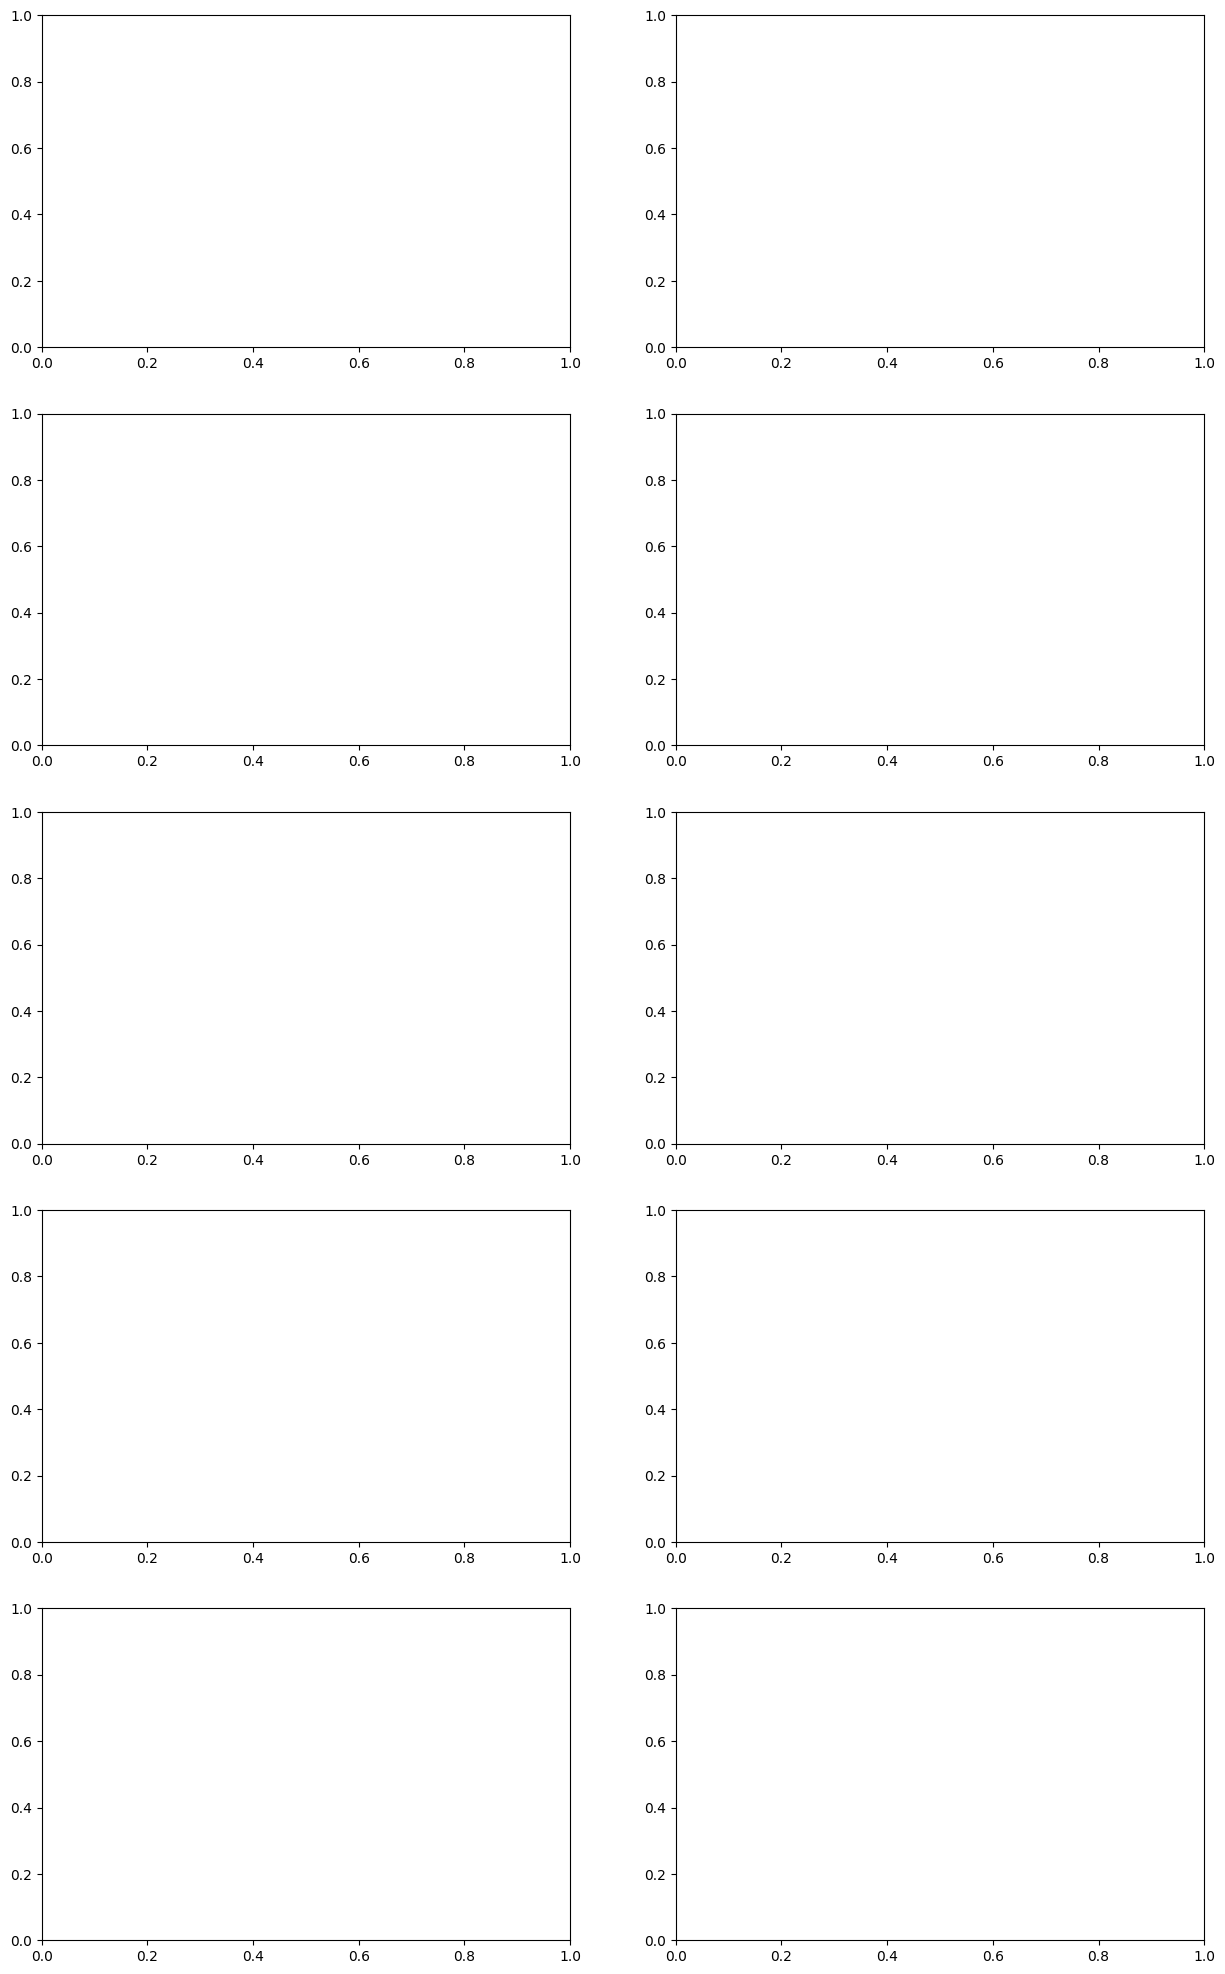

In [ ]:
# Create states at different points on the Bloch sphere
states = [
    ("θ=0 (|0⟩)", 0, 0),
    ("θ=π/4", np.pi/4, 0),
    ("θ=π/2 (|+⟩)", np.pi/2, 0),
    ("θ=3π/4", 3*np.pi/4, 0),
    ("θ=π (|1⟩)", np.pi, 0)
]

# Measure each state 1000 times
results = []

for label, theta, phi in states:
    # Create the state
    qc = create_bloch_state(theta, phi)
    
    # Add measurement
    qc.measure_all()
    
    # Run the circuit
    backend = BasicSimulator()
    job = backend.run(qc, shots=1000)
    result = job.result()
    counts = result.get_counts()
    
    # Calculate theoretical probabilities
    prob_0 = np.cos(theta/2)**2
    prob_1 = np.sin(theta/2)**2
    
    results.append((label, counts, prob_0, prob_1))

# Visualize the results
fig, axs = plt.subplots(len(states), 2, figsize=(15, 5*len(states)))

for i, (label, counts, prob_0, prob_1) in enumerate(results):
    # Plot the state on the Bloch sphere
    theta, phi = states[i][1], states[i][2]
    qc = create_bloch_state(theta, phi)
    state = Statevector(qc)
    plot_bloch_multivector(state, ax=axs[i, 0], title=f'State: {label}')
    
    # Plot the measurement results
    plot_histogram(counts, ax=axs[i, 1], title=f'Measurement Results (Theoretical: |0⟩={prob_0:.4f}, |1⟩={prob_1:.4f})')

plt.tight_layout()
plt.show()

### Observations:

- States closer to the north pole ($|0\rangle$) have a higher probability of measuring 0
- States closer to the south pole ($|1\rangle$) have a higher probability of measuring 1
- States on the equator (like $|+\rangle$) have equal probabilities of measuring 0 or 1

The probability of measuring $|0\rangle$ is $\cos^2(\theta/2)$ and the probability of measuring $|1\rangle$ is $\sin^2(\theta/2)$, where $\theta$ is the polar angle on the Bloch sphere.

## 7. Quantum State Tomography

Quantum state tomography is the process of reconstructing a quantum state from measurement results. In Qiskit, we can use the `state_tomography_circuits` and `StateTomographyFitter` to perform this reconstruction.

In [ ]:
# Import necessary packages
from qiskit.quantum_info import state_fidelity
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

# Create a quantum state
theta, phi = np.pi/3, np.pi/4
qc = create_bloch_state(theta, phi)
target_state = Statevector(qc)

# Create tomography circuits
qst_circuits = state_tomography_circuits(qc, [0])

# Execute the tomography circuits
backend = BasicSimulator()
job = backend.run(qst_circuits, shots=1000)
result = job.result()

# Perform state tomography
tomo_fitter = StateTomographyFitter(result, qst_circuits)
rho_fit = tomo_fitter.fit(method='lstsq')

# Calculate fidelity between target and reconstructed state
fidelity = state_fidelity(target_state, rho_fit)
print(f"Fidelity between target and reconstructed state: {fidelity:.6f}")

# Visualize the target and reconstructed states
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plot_bloch_multivector(target_state, ax=axs[0], title='Target State')
plot_bloch_multivector(rho_fit, ax=axs[1], title='Reconstructed State')

plt.tight_layout()
plt.show()

## 8. Quantum State Evolution

Let's visualize how a quantum state evolves on the Bloch sphere when subjected to a sequence of gates.

In [ ]:
# Create a circuit with a sequence of gates
qc = QuantumCircuit(1)

# Define the sequence of gates
gates = [
    ('Initial |0⟩', lambda qc: None),
    ('H', lambda qc: qc.h(0)),
    ('T', lambda qc: qc.t(0)),
    ('X', lambda qc: qc.x(0)),
    ('S', lambda qc: qc.s(0)),
    ('H', lambda qc: qc.h(0))
]

# Apply gates sequentially and track the state
states = []
circuit = QuantumCircuit(1)

for label, gate_func in gates:
    # Apply the gate
    gate_func(circuit)
    
    # Get the state
    state = Statevector(circuit)
    states.append((label, state))

# Visualize the state evolution
fig, axs = plt.subplots(1, len(states), figsize=(20, 5))

for i, (label, state) in enumerate(states):
    plot_bloch_multivector(state, ax=axs[i], title=f'After {label}')

plt.suptitle('Quantum State Evolution', fontsize=16)
plt.tight_layout()
plt.show()

## 9. Bloch Vector Representation

The Bloch vector is a 3D vector $(x, y, z)$ that represents a quantum state on the Bloch sphere. Let's see how to calculate and visualize Bloch vectors in Qiskit.

In [ ]:
from qiskit.quantum_info import Pauli, Operator

def calculate_bloch_vector(state):
    """Calculate the Bloch vector for a given quantum state."""
    # Create Pauli operators
    X = Operator(Pauli('X'))
    Y = Operator(Pauli('Y'))
    Z = Operator(Pauli('Z'))
    
    # Calculate expectation values
    x = state.expectation_value(X).real
    y = state.expectation_value(Y).real
    z = state.expectation_value(Z).real
    
    return [x, y, z]

# Create several states
states = [
    ("θ=0 (|0⟩)", 0, 0),
    ("θ=π/2, φ=0 (|+⟩)", np.pi/2, 0),
    ("θ=π/2, φ=π/2 (|+i⟩)", np.pi/2, np.pi/2),
    ("θ=π (|1⟩)", np.pi, 0)
]

# Calculate and visualize Bloch vectors
fig, axs = plt.subplots(1, len(states), figsize=(20, 5))

for i, (label, theta, phi) in enumerate(states):
    # Create the state
    qc = create_bloch_state(theta, phi)
    state = Statevector(qc)
    
    # Calculate the Bloch vector
    bloch_vector = calculate_bloch_vector(state)
    
    # Visualize the state
    plot_bloch_vector(bloch_vector, ax=axs[i], title=f'{label}\nBloch vector: {bloch_vector}')

plt.suptitle('Bloch Vector Representation', fontsize=16)
plt.tight_layout()
plt.show()

## 10. Density Matrix and Mixed States

So far, we've focused on pure quantum states, which lie on the surface of the Bloch sphere. Mixed states, represented by density matrices, lie inside the Bloch sphere.

In [ ]:
from qiskit.quantum_info import DensityMatrix

# Create a pure state
qc = create_bloch_state(np.pi/4, np.pi/4)
pure_state = Statevector(qc)
pure_dm = DensityMatrix(pure_state)

# Create a mixed state (50% |0⟩ and 50% |1⟩)
mixed_dm = 0.5 * DensityMatrix.from_label('0') + 0.5 * DensityMatrix.from_label('1')

# Create a partially mixed state
partial_dm = 0.8 * DensityMatrix(pure_state) + 0.2 * mixed_dm

# Visualize the states
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_bloch_multivector(pure_dm, ax=axs[0], title='Pure State')
plot_bloch_multivector(mixed_dm, ax=axs[1], title='Completely Mixed State')
plot_bloch_multivector(partial_dm, ax=axs[2], title='Partially Mixed State')

plt.suptitle('Pure and Mixed States on the Bloch Sphere', fontsize=16)
plt.tight_layout()
plt.show()

### Observations:

- Pure states lie on the surface of the Bloch sphere
- The completely mixed state (equal mixture of $|0\rangle$ and $|1\rangle$) is at the center of the Bloch sphere
- Partially mixed states lie inside the Bloch sphere, with the distance from the center indicating the purity of the state

## 11. Quantum Noise and Decoherence

Quantum noise and decoherence cause pure states to become mixed states. Let's simulate this process using Qiskit's noise models.

In [ ]:
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Create a pure state
theta, phi = np.pi/4, np.pi/4
qc = create_bloch_state(theta, phi)
qc.measure_all()

# Create noise models with different depolarizing error rates
error_rates = [0.0, 0.1, 0.3, 0.5, 0.9]
results = []

for error_rate in error_rates:
    # Create a noise model
    noise_model = NoiseModel()
    error = depolarizing_error(error_rate, 1)
    noise_model.add_all_qubit_quantum_error(error, ['rx', 'ry', 'rz'])
    
    # Run the circuit with the noise model
    backend = AerSimulator(noise_model=noise_model)
    job = backend.run(qc, shots=1000)
    result = job.result()
    counts = result.get_counts()
    
    results.append((error_rate, counts))

# Visualize the results
fig, axs = plt.subplots(1, len(error_rates), figsize=(20, 5))

for i, (error_rate, counts) in enumerate(results):
    plot_histogram(counts, ax=axs[i], title=f'Error Rate: {error_rate}')

plt.suptitle('Effect of Depolarizing Noise on Measurement Results', fontsize=16)
plt.tight_layout()
plt.show()

### Observations:

- As the error rate increases, the measurement results approach a 50-50 distribution
- This is because the state is moving from the surface of the Bloch sphere toward the center (completely mixed state)
- At an error rate of 1.0, the state would be completely mixed, resulting in exactly 50% probability for each outcome

## 12. Advanced Example: Quantum Teleportation on the Bloch Sphere

Quantum teleportation is a protocol that transfers a quantum state from one qubit to another using entanglement and classical communication. Let's visualize this process on the Bloch sphere.

In [ ]:
# Create a quantum teleportation circuit
def quantum_teleportation(state_to_teleport):
    # Create a circuit with 3 qubits and 2 classical bits
    qc = QuantumCircuit(3, 2)
    
    # Prepare the state to teleport on qubit 0
    qc.initialize(state_to_teleport, 0)
    
    # Create entanglement between qubits 1 and 2
    qc.h(1)
    qc.cx(1, 2)
    
    # Bell measurement on qubits 0 and 1
    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])
    
    # Apply corrections on qubit 2 based on measurement results
    qc.x(2).c_if(1, 1)  # Apply X if qubit 1 is 1
    qc.z(2).c_if(0, 1)  # Apply Z if qubit 0 is 1
    
    return qc

# States to teleport
states_to_teleport = [
    ("θ=π/4, φ=0", [np.cos(np.pi/8), np.sin(np.pi/8)]),
    ("θ=π/2, φ=π/4", [1/np.sqrt(2), np.exp(1j*np.pi/4)/np.sqrt(2)]),
    ("θ=3π/4, φ=π/2", [np.cos(3*np.pi/8), np.exp(1j*np.pi/2)*np.sin(3*np.pi/8)])
]

# Teleport each state and visualize the results
for label, state in states_to_teleport:
    # Create the teleportation circuit
    qc = quantum_teleportation(state)
    
    # Visualize the circuit
    print(f"Teleporting state {label}: {state}")
    display(qc.draw(output='mpl'))
    
    # Simulate the teleportation for each possible measurement outcome
    outcomes = ['00', '01', '10', '11']
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))
    
    # Plot the original state
    qc_orig = QuantumCircuit(1)
    qc_orig.initialize(state, 0)
    orig_state = Statevector(qc_orig)
    plot_bloch_multivector(orig_state, ax=axs[0], title='Original State')
    
    # For each possible measurement outcome
    for i, outcome in enumerate(outcomes):
        # Create a circuit that simulates this specific measurement outcome
        qc_outcome = QuantumCircuit(3)
        qc_outcome.initialize(state, 0)
        qc_outcome.h(1)
        qc_outcome.cx(1, 2)
        qc_outcome.cx(0, 1)
        qc_outcome.h(0)
        
        # Apply corrections based on the outcome
        if outcome[1] == '1':  # Second bit is 1
            qc_outcome.x(2)
        if outcome[0] == '1':  # First bit is 1
            qc_outcome.z(2)
        
        # Get the final state of qubit 2
        state_vector = Statevector(qc_outcome)
        # Trace out qubits 0 and 1 to get the state of qubit 2
        reduced_dm = state_vector.partial_trace([0, 1])
        
        # Plot the teleported state
        plot_bloch_multivector(reduced_dm, ax=axs[i+1], title=f'Teleported State\nMeasurement: {outcome}')
    
    plt.suptitle(f'Quantum Teleportation of State {label}', fontsize=16)
    plt.tight_layout()
    plt.show()

### Observations:

- Regardless of the measurement outcome, the state is successfully teleported to qubit 2
- The corrections (X and Z gates) applied based on the measurement results ensure that the final state matches the original state
- This demonstrates the power of quantum teleportation: transferring a quantum state without directly sending the qubit itself

## 13. Conclusion

The Bloch sphere is a powerful visualization tool for understanding qubit states and operations in quantum computing. In this notebook, we've explored:

1. The mathematical representation of quantum states on the Bloch sphere
2. Basic states and their positions on the Bloch sphere
3. Quantum gates as rotations on the Bloch sphere
4. Creating arbitrary states and measuring them
5. Quantum state tomography and state evolution
6. Bloch vector representation
7. Density matrices and mixed states
8. Quantum noise and decoherence
9. Advanced applications like quantum teleportation

Understanding the Bloch sphere is essential for developing intuition about quantum computing and designing quantum algorithms. The visualizations and examples in this notebook provide a foundation for further exploration of quantum computing concepts using Qiskit.

## References

1. Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information. Cambridge University Press.
2. Qiskit Documentation: https://qiskit.org/documentation/
3. Qiskit Textbook: https://qiskit.org/textbook/
4. Bloch Sphere Visualization: https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html
5. Quantum State Tomography: https://qiskit.org/documentation/tutorials/noise/3_state_tomography.html